In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobilenet-trained-weights/mobilenet_1_0_224_tf_no_top.h5
/kaggle/input/vgg16-trained-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/realwaste/realwaste-main/README.md
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_670.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_408.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_222.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_200.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_533.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_7.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_285.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_210.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_243.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_590.jpg
/kaggle/input/realwaste/realwaste-main/RealWaste/Metal/Metal_214.jpg
/kaggle/input/realwaste/realwaste-mai

{'metal': 769, 'white-glass': 775, 'biological': 985, 'paper': 1050, 'brown-glass': 607, 'battery': 945, 'trash': 697, 'cardboard': 891, 'shoes': 1977, 'clothes': 5325, 'plastic': 865, 'green-glass': 629}


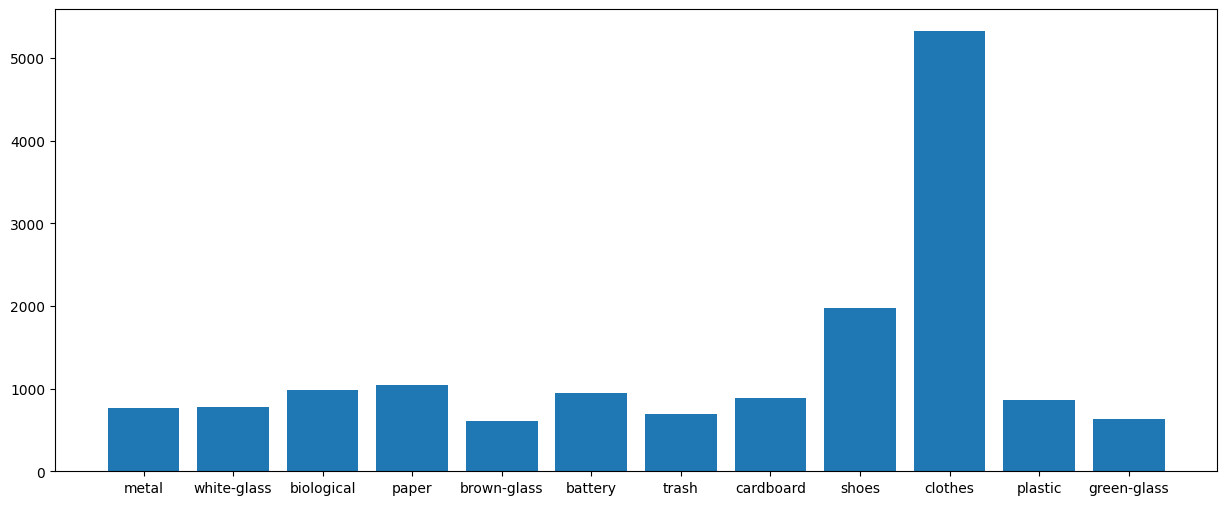

In [2]:
# from google.colab import drive
# drive.mount ('/content/drive')

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("joebeachcapital/realwaste")

# print("Path to dataset files:", path)

# #chuyển dataset vừa lưu vào trong thư mục dataset của drive
# !cp -r /root/.cache/kagglehub/datasets/joebeachcapital/realwaste/versions/1 /content/drive/MyDrive/DoAn/dataset



source="/kaggle/input/garbage-classification/garbage_classification"

#Liệt kê các thư mục trong src lưu thành lable
import os
lables=os.listdir(source)

lables

#Đếm số lượng ảnh trong các thư mục
dataset_count = {}
for label in lables:
    label_path = os.path.join(source, label)
    count = len(os.listdir(label_path))
    dataset_count[label] = count

print(dataset_count)

#visualize số lượng nhãn
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
labels = list(dataset_count.keys())
lable_count = list(dataset_count.values())
plt.bar(labels, lable_count)
plt.show()





In [3]:
import os
import shutil
import random

# Đường dẫn dataset gốc
DATASET_PATH = "/kaggle/input/garbage-classification/garbage_classification" #đường dẫn thư mục dữ liệu gốc
OUTPUT_PATH = "/kaggle/working/dataset_split"  #đường dẫn dataset sau khi chia train test
TRAIN_SPLIT = 0.8  # Tỷ lệ tập train

# Tạo các thư mục train và test
train_dir = os.path.join(OUTPUT_PATH, "train")
test_dir = os.path.join(OUTPUT_PATH, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Duyệt qua các nhãn (thư mục con)
for label in os.listdir(DATASET_PATH): #kết quả là glass, metal,...
    label_path = os.path.join(DATASET_PATH, label) # tạo đường dẫn đến thư mục con kết quả là /content/drive/MyDrive/DoAn/dataset/1/realwaste-main/RealWaste/Glass
    if os.path.isdir(label_path): #kiểm tra thư mục có tồn tại k?
        # Tạo thư mục nhãn trong train và test
        os.makedirs(os.path.join(train_dir, label), exist_ok=True)#/content/drive/MyDrive/DoAn/dataset_split/train/Cardboard
        os.makedirs(os.path.join(test_dir, label), exist_ok=True)

        # Lấy danh sách tất cả ảnh
        images = os.listdir(label_path) #danh sách đường dẫn các ảnh trong dataset gốc/content/drive/MyDrive/DoAn/dataset/1/realwaste-main/RealWaste/Cardboard/Cardboard_1.jpg
        random.shuffle(images)  # trộn lên

        # Chia dữ liệu
        split_idx = int(len(images) * TRAIN_SPLIT)
        train_images = images[:split_idx]
        test_images = images[split_idx:]

        # Copy ảnh vào thư mục tương ứng
        for img in train_images:
            shutil.copy(os.path.join(label_path, img), os.path.join(train_dir, label, img))
        for img in test_images:
            shutil.copy(os.path.join(label_path, img), os.path.join(test_dir, label, img))

print("Dữ liệu đã được chia ngẫu nhiên vào thư mục train và test.")

Dữ liệu đã được chia ngẫu nhiên vào thư mục train và test.


Found 12409 files belonging to 12 classes.
Found 3106 files belonging to 12 classes.
Tập train và test đã được load.


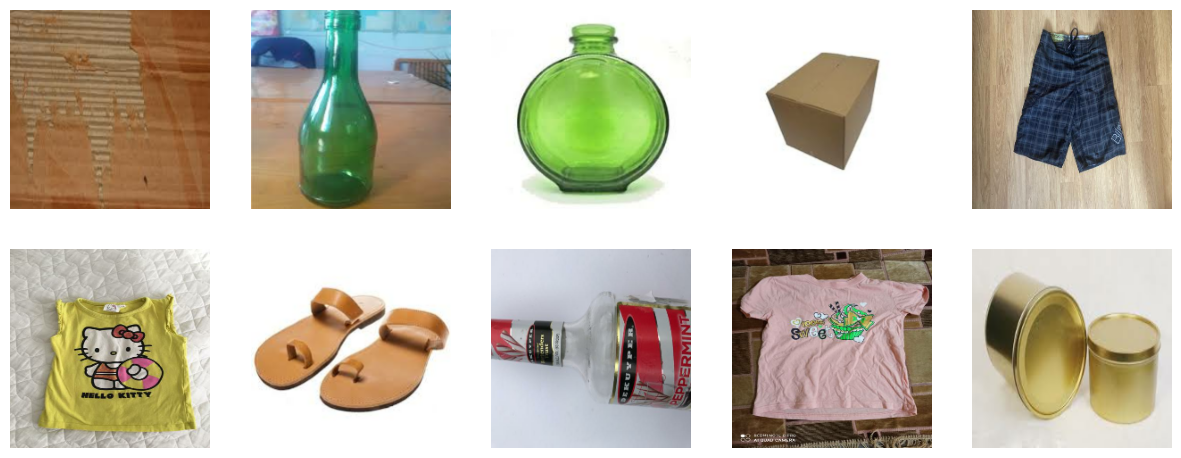

In [4]:

OUTPUT_PATH = "/kaggle/working/dataset_split" 

###################################
import tensorflow as tf
import os
# Đường dẫn tới các thư mục train và test
train_path = os.path.join(OUTPUT_PATH, "train")
test_path = os.path.join(OUTPUT_PATH, "test")#/content/drive/MyDrive/DoAn/dataset_split/test

IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32 # chia thành các lô cho qtrinh huấn luyện với mỗi lô chứa 32 ảnh (8,16,32,64)

# Load tập train
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Load tập test
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Lấy danh sách nhãn từ dataset
class_names = train_dataset.class_names

# Chuẩn hóa dữ liệu
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    # mỗi ô màu có gtri px từ 0-255 chia 255 để về khoảng 0-1, số nhỏ ít tiêu tốn tài nguyên và time
    return image, label

train_dataset = train_dataset.map(preprocess)#áp dụng cho all data bên trong
test_dataset = test_dataset.map(preprocess)

# Tối ưu hóa hiệu suất tự động chia data trong quá trình train
AUTOTUNE = tf.data.AUTOTUNE #không làm tràn bộ nhớ but qtrinh chuẩn bị dữ liệu chậm
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

print("Tập train và test đã được load.")

# Trực quan hóa ngẫu nhiên 10 hình kèm dữ liệu trong tập train
# Trực quan hóa ngẫu nhiên 10 hình kèm dữ liệu trong tập train
import matplotlib.pyplot as plt
for images, labels in train_dataset.take(1):  # Shuffle lại để hiển thị ngẫu nhiên
    plt.figure(figsize=(15, 15))
    for i in range(min(10, len(images))):  # Đảm bảo không vượt quá số lượng ảnh
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())
        #plt.title(class_names[labels[i].numpy()])  # Sử dụng class_names từ TensorFlow
        plt.axis("off")
    plt.show()



from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Lớp Dense: lớp tuyến tính (y=ax+b)


# Lớp Conv2D: lớp tích chập sử dụng cho data dạng ma trận (trích xuất các đặc trưng dđ của ảnh thông qua việc use bộ lọc để qsat dc nhiều ảnh hơn. Sử dụng nhiều bộ lọc (muốn nhiêu cũng được)


# kernel: cửa sổ trượt, bộ lọc

# Pooling: tổng hợp gtri, giảm kích thước dữ liệu nhưng không làm mất mát quá nhiều dữ liệu, giữ lại được đặc trưng chính


# Flatten: trải phẳng dữ liệu biến dữ liệu thành vecto 1 chiều

# Dropout: tắt ngẫu nhiên 1 số lượng neural từ đó giảm được tình trạng overfitting






In [5]:
import tensorflow as tf

# Khởi tạo TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("TPU initialized successfully!")
except ValueError:
    print("TPU not found, using CPU/GPU instead.")
    strategy = tf.distribute.get_strategy()

TPU not found, using CPU/GPU instead.


In [6]:
import tensorflow as tf

# Kiểm tra số GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"Available GPUs: {len(gpus)}")
if len(gpus) < 2:
    print("Need at least 2 GPUs for this setup!")


Available GPUs: 2


In [7]:
strategy = tf.distribute.MirroredStrategy()

In [8]:

# Định nghĩa mô hình
with strategy.scope():
    model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(class_names), activation='softmax')
    ])
    
    # Compile mô hình
    # adam: tự điều chỉnh tốc độ học, đỡ tốn tài nguyên
    #
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
checkpoint_dir = "/kaggle/working/modes"
os.makedirs(checkpoint_dir)

In [10]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/base_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/base_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# # Checkpoint lưu mô hình qua từng epoch
# checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
#     filepath=f"{checkpoint_dir}/base_model_epoch_{epoch:02d}.keras",
#     save_freq="epoch",
#     verbose=1
# )

In [11]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [12]:

# Huấn luyện mô hình
import time
start_time = time.time()
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[checkpoint_high_acc, checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện:", end_time - start_time, "giây")


Epoch 1/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3817 - loss: 2.9300
Epoch 1: val_accuracy improved from -inf to 0.57824, saving model to /kaggle/working/modes/base_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 1.25884, saving model to /kaggle/working/modes/base_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 43s 94ms/step - accuracy: 0.3820 - loss: 2.9271 - val_accuracy: 0.5782 - val_loss: 1.2588
Epoch 2/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6383 - loss: 1.0976
Epoch 2: val_accuracy improved from 0.57824 to 0.60914, saving model to /kaggle/working/modes/base_model_highest_accuracy.keras

Epoch 2: val_loss improved from 1.25884 to 1.18048, saving model to /kaggle/working/modes/base_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.6383 - loss: 1.0974 - val_accuracy: 0.6091 - val_loss: 1.1805
Epoch 3/50
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7478 - loss: 0.7540
Epoch 3: val

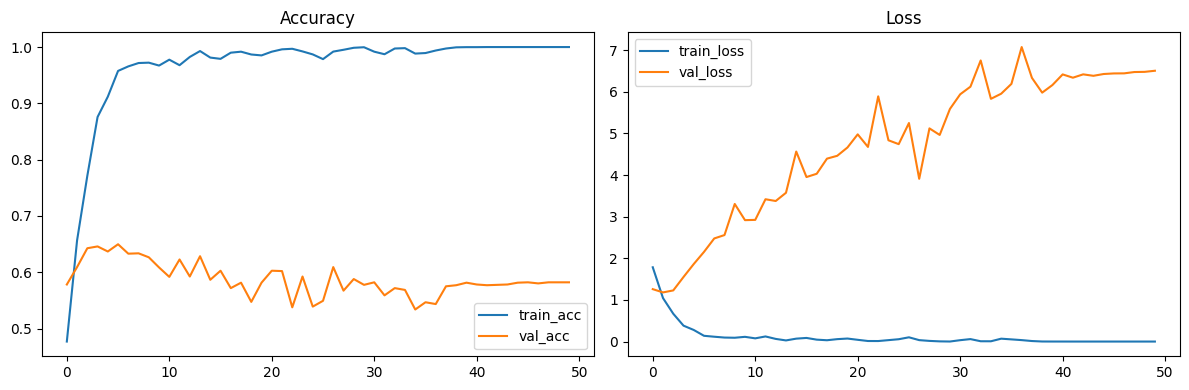

In [13]:

# Vẽ biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc, label="train_acc")
axs[0].plot(val_acc, label="val_acc")
axs[0].set_title("Accuracy")
axs[0].legend()
axs[1].plot(train_loss, label="train_loss")
axs[1].plot(val_loss, label="val_loss")
axs[1].set_title("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()


In [14]:

# Đánh giá mô hình
eval = model.evaluate(test_dataset)
print(eval)

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5878 - loss: 6.9212
[6.504698753356934, 0.5820991396903992]


In [15]:
from tensorflow.keras.models import load_model
model_high_accuracy = load_model("/kaggle/working/modes/base_model_highest_accuracy.keras")
model_low_loss = load_model("/kaggle/working/modes/base_model_lowest_loss.keras")

In [16]:
eval = model_high_accuracy.evaluate(test_dataset) 
print(eval)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6314 - loss: 2.2827
[2.179837226867676, 0.6423051953315735]


In [17]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/resnet_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/resnet_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# # Checkpoint lưu mô hình qua từng epoch
# checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
#     filepath=f"{checkpoint_dir}/base_model_epoch_{epoch:02d}.keras",
#     save_freq="epoch",
#     verbose=1
# )

In [18]:

# # Khởi tạo mô hình transfer learning với resnet 50
from tensorflow.keras.applications import ResNet50V2

# Đường dẫn đến tệp mô hình
weights_path = '/kaggle/input/resnet50v2-trained-weights/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
# Tải mô hình ResNet50V2 đã được huấn luyện trước (bỏ phần fully connected layer cuối cùng)
base_model = ResNet50V2(weights=weights_path, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


# Đóng băng các layer của base model để không bị huấn luyện lại
for layer in base_model.layers:
    layer.trainable = False

# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)


model_resnet = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(len(class_names), activation='softmax')
])


# Compile mô hình
model_resnet.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:

# Huấn luyện mô hình
import time
start_time = time.time()
history = model_resnet.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc, checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện:", end_time - start_time, "giây")


Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7960 - loss: 0.8705
Epoch 1: val_accuracy improved from -inf to 0.90728, saving model to /kaggle/working/modes/resnet_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 0.30200, saving model to /kaggle/working/modes/resnet_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 67s 140ms/step - accuracy: 0.7962 - loss: 0.8696 - val_accuracy: 0.9073 - val_loss: 0.3020
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9633 - loss: 0.1098
Epoch 2: val_accuracy improved from 0.90728 to 0.91017, saving model to /kaggle/working/modes/resnet_model_highest_accuracy.keras

Epoch 2: val_loss did not improve from 0.30200
388/388 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.9633 - loss: 0.1098 - val_accuracy: 0.9102 - val_loss: 0.3278
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9794 - loss: 0.0573
Epoch 3: val_accuracy improved from 0.91017 to 0.91243, saving model to /

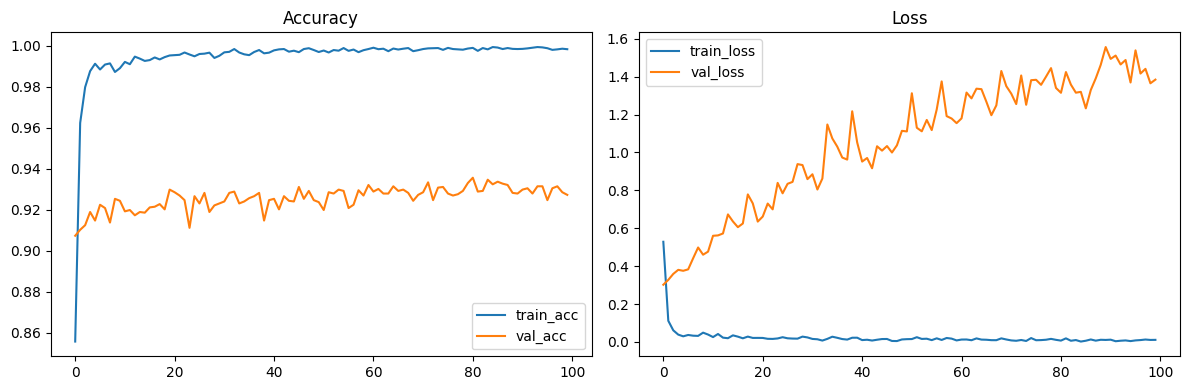

In [20]:

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc, label="train_acc")
axs[0].plot(val_acc, label="val_acc")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot(train_loss, label="train_loss")
axs[1].plot(val_loss, label="val_loss")
axs[1].set_title("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [21]:
# Đánh giá mô hình
eval = model.evaluate(test_dataset)
print(eval)

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5878 - loss: 6.9212
[6.504698753356934, 0.5820991396903992]


In [22]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/vgg16_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/vgg16_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# # Checkpoint lưu mô hình qua từng epoch
# checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
#     filepath=f"{checkpoint_dir}/base_model_epoch_{epoch:02d}.keras",
#     save_freq="epoch",
#     verbose=1
# )

In [23]:
from tensorflow.keras.applications import VGG16

weights_path_vgg = '/kaggle/input/vgg16-trained-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# Khởi tạo mô hình VGG16
base_model_vgg = VGG16(weights=weights_path_vgg, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Đóng băng các layer
for layer in base_model_vgg.layers:
    layer.trainable = False
# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_vgg.compile(optimizer= optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [24]:

# Huấn luyện mô hình
start_time = time.time()
history_vgg = model_vgg.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc, checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện VGG16:", end_time - start_time, "giây")

Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6745 - loss: 1.0564
Epoch 1: val_accuracy improved from -inf to 0.85802, saving model to /kaggle/working/modes/vgg16_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 0.46322, saving model to /kaggle/working/modes/vgg16_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 107s 232ms/step - accuracy: 0.6748 - loss: 1.0556 - val_accuracy: 0.8580 - val_loss: 0.4632
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8861 - loss: 0.3633
Epoch 2: val_accuracy improved from 0.85802 to 0.87605, saving model to /kaggle/working/modes/vgg16_model_highest_accuracy.keras

Epoch 2: val_loss improved from 0.46322 to 0.38388, saving model to /kaggle/working/modes/vgg16_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 72s 187ms/step - accuracy: 0.8861 - loss: 0.3632 - val_accuracy: 0.8760 - val_loss: 0.3839
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9300 - loss: 0.2363

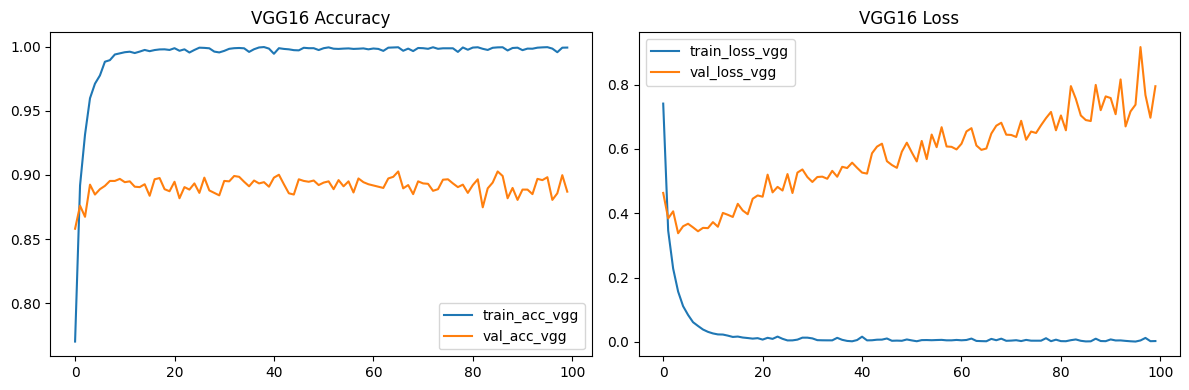

In [25]:

# Vẽ đồ thị
train_acc_vgg = history_vgg.history["accuracy"]
val_acc_vgg = history_vgg.history["val_accuracy"]
train_loss_vgg = history_vgg.history["loss"]
val_loss_vgg = history_vgg.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_vgg, label="train_acc_vgg")
axs[0].plot(val_acc_vgg, label="val_acc_vgg")
axs[0].set_title("VGG16 Accuracy")
axs[0].legend()

axs[1].plot(train_loss_vgg, label="train_loss_vgg")
axs[1].plot(val_loss_vgg, label="val_loss_vgg")
axs[1].set_title("VGG16 Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [26]:
# Đánh giá mô hình
eval = model.evaluate(test_dataset)
print(eval)

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5878 - loss: 6.9212
[6.504698753356934, 0.5820991396903992]


In [27]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/mobilenet_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/mobilenet_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# # Checkpoint lưu mô hình qua từng epoch
# checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
#     filepath=f"{checkpoint_dir}/base_model_epoch_{epoch:02d}.keras",
#     save_freq="epoch",
#     verbose=1
# )

In [28]:
from tensorflow.keras.applications import MobileNet
weights_path_mb = '/kaggle/input/mobilenet-trained-weights/mobilenet_1_0_224_tf_no_top.h5'
# Khởi tạo mô hình MobileNet
base_model_mobilenet = MobileNet(weights = weights_path_mb, include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Đóng băng các layer
for layer in base_model_mobilenet.layers:
    layer.trainable = False
# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

model_mobilenet = Sequential([
    base_model_mobilenet,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_mobilenet.compile(optimizer= optimizer,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])



In [29]:
# Huấn luyện mô hình
start_time = time.time()
history_mobilenet = model_mobilenet.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc,checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện MobileNet:", end_time - start_time, "giây")



Epoch 1/100
387/388 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7912 - loss: 0.7547
Epoch 1: val_accuracy improved from -inf to 0.90277, saving model to /kaggle/working/modes/mobilenet_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 0.29474, saving model to /kaggle/working/modes/mobilenet_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.7915 - loss: 0.7532 - val_accuracy: 0.9028 - val_loss: 0.2947
Epoch 2/100
387/388 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9674 - loss: 0.0916
Epoch 2: val_accuracy improved from 0.90277 to 0.91500, saving model to /kaggle/working/modes/mobilenet_model_highest_accuracy.keras

Epoch 2: val_loss improved from 0.29474 to 0.27505, saving model to /kaggle/working/modes/mobilenet_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9674 - loss: 0.0916 - val_accuracy: 0.9150 - val_loss: 0.2750
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9831 - lo

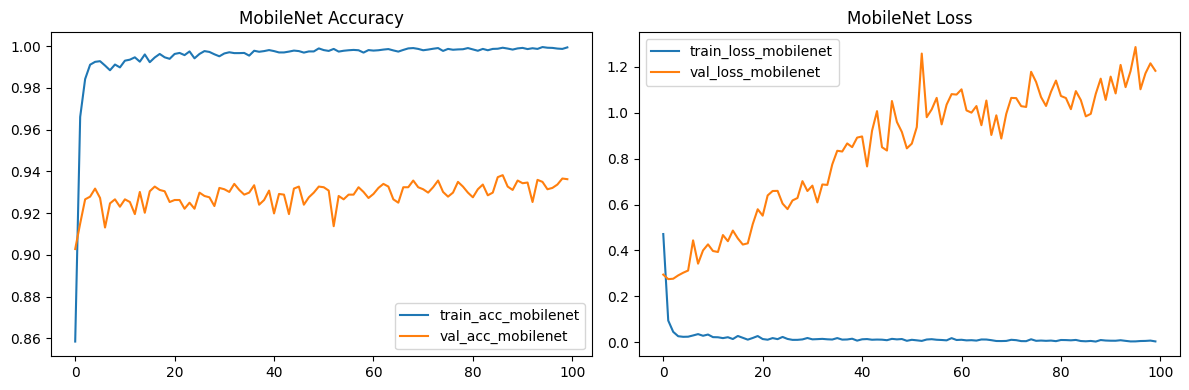

In [30]:
# Vẽ đồ thị
train_acc_mobilenet = history_mobilenet.history["accuracy"]
val_acc_mobilenet = history_mobilenet.history["val_accuracy"]
train_loss_mobilenet = history_mobilenet.history["loss"]
val_loss_mobilenet = history_mobilenet.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_mobilenet, label="train_acc_mobilenet")
axs[0].plot(val_acc_mobilenet, label="val_acc_mobilenet")
axs[0].set_title("MobileNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_mobilenet, label="train_loss_mobilenet")
axs[1].plot(val_loss_mobilenet, label="val_loss_mobilenet")
axs[1].set_title("MobileNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()


In [31]:
# Đánh giá mô hình
eval = model.evaluate(test_dataset)
print(eval)

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5878 - loss: 6.9212
[6.504698753356934, 0.5820991396903992]


In [32]:
# Checkpoint lưu mô hình có accuracy cao nhất
checkpoint_high_acc = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/alexnet_model_highest_accuracy.keras",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)

# Checkpoint lưu mô hình có loss thấp nhất
checkpoint_low_loss = tf.keras.callbacks.ModelCheckpoint(
    filepath=f"{checkpoint_dir}/alexnet_model_lowest_loss.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# # Checkpoint lưu mô hình qua từng epoch
# checkpoint_every_epoch = tf.keras.callbacks.ModelCheckpoint(
#     filepath=f"{checkpoint_dir}/base_model_epoch_{epoch:02d}.keras",
#     save_freq="epoch",
#     verbose=1
# )

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# định nghĩa adam với learning rate = 0.0001
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

# Tạo mô hình AlexNet
model_alexnet = Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(384, kernel_size=(3, 3), activation='relu', padding="same"),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile mô hình
model_alexnet.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])




In [34]:
# Huấn luyện mô hình
start_time = time.time()
history_alexnet = model_alexnet.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[checkpoint_high_acc,checkpoint_low_loss])
end_time = time.time()
print("Thời gian huấn luyện AlexNet:", end_time - start_time, "giây")

Epoch 1/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3864 - loss: 1.9288
Epoch 1: val_accuracy improved from -inf to 0.58918, saving model to /kaggle/working/modes/alexnet_model_highest_accuracy.keras

Epoch 1: val_loss improved from inf to 1.21312, saving model to /kaggle/working/modes/alexnet_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.3866 - loss: 1.9281 - val_accuracy: 0.5892 - val_loss: 1.2131
Epoch 2/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5846 - loss: 1.2191
Epoch 2: val_accuracy improved from 0.58918 to 0.64070, saving model to /kaggle/working/modes/alexnet_model_highest_accuracy.keras

Epoch 2: val_loss improved from 1.21312 to 1.15016, saving model to /kaggle/working/modes/alexnet_model_lowest_loss.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.5846 - loss: 1.2190 - val_accuracy: 0.6407 - val_loss: 1.1502
Epoch 3/100
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6601 - loss: 1.01

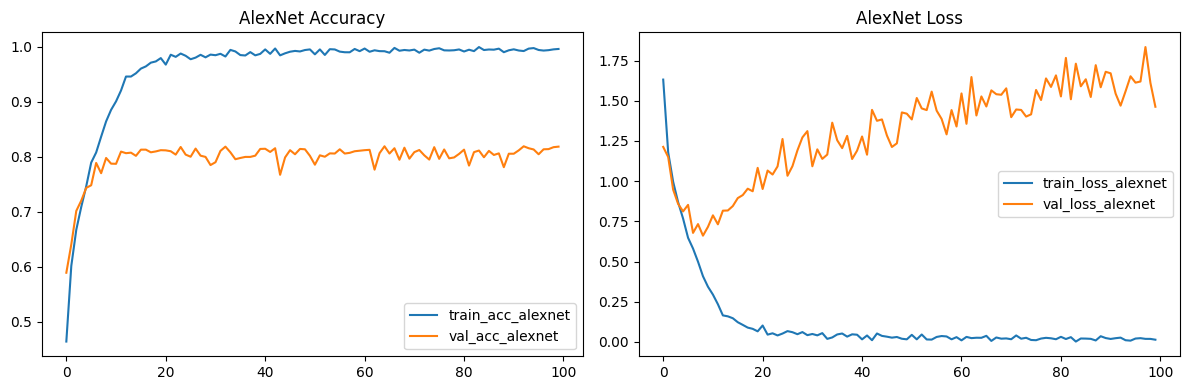

In [35]:
# Vẽ đồ thị
train_acc_alexnet = history_alexnet.history["accuracy"]
val_acc_alexnet = history_alexnet.history["val_accuracy"]
train_loss_alexnet = history_alexnet.history["loss"]
val_loss_alexnet = history_alexnet.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(train_acc_alexnet, label="train_acc_alexnet")
axs[0].plot(val_acc_alexnet, label="val_acc_alexnet")
axs[0].set_title("AlexNet Accuracy")
axs[0].legend()

axs[1].plot(train_loss_alexnet, label="train_loss_alexnet")
axs[1].plot(val_loss_alexnet, label="val_loss_alexnet")
axs[1].set_title("AlexNet Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [36]:
# Đánh giá mô hình
eval = model.evaluate(test_dataset)
print(eval)

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5878 - loss: 6.9212
[6.504698753356934, 0.5820991396903992]
